# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=3))

{
   "coord": {
      "lon": -90.35,
      "lat": -0.74
   },
   "weather": [
      {
         "id": 803,
         "main": "Clouds",
         "description": "broken clouds",
         "icon": "04n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 70,
      "feels_like": 75.18,
      "temp_min": 70,
      "temp_max": 70,
      "pressure": 1011,
      "humidity": 91
   },
   "visibility": 10000,
   "wind": {
      "speed": 1.99,
      "deg": 213,
      "gust": 5.99
   },
   "clouds": {
      "all": 59
   },
   "dt": 1595206521,
   "sys": {
      "type": 3,
      "id": 2005652,
      "country": "EC",
      "sunrise": 1595160306,
      "sunset": 1595203798
   },
   "timezone": -21600,
   "id": 3652764,
   "name": "Puerto Ayora",
   "cod": 200
}


In [4]:
# Get weather data
names = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

count = 1
next_record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
    
        # append data into empty sets
        names.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
    
        # conditional for records and sets
        if count <= 50:
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1 
        
        else: 
            count = 0
            next_record += 1
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1
    except: 
        print("City not found. Skipping...")
        pass
        

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------") 

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Chokurdakh
Processing Record 2 of Set 1 | Ishimbay
Processing Record 3 of Set 1 | Port Keats
Processing Record 4 of Set 1 | Pevek
Processing Record 5 of Set 1 | George Town
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | Puerto Ayora
Processing Record 9 of Set 1 | Tall Kayf
Processing Record 10 of Set 1 | Dawson Creek
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | Bredasdorp
Processing Record 12 of Set 1 | Codrington
Processing Record 13 of Set 1 | Hobart
Processing Record 14 of Set 1 | Tokur
Processing Record 15 of Set 1 | Iqaluit
Processing Record 16 of Set 1 | Lerwick
Processing Record 17 of Set 1 | Feicheng
Processing Record 18 of Set 1 | Balabac
Processing Record 19 of Set 1 | Vila Velha
Processing Record 20 of Set 1 | Rikitea
Processing Record 21 of Set 1 | Sinegor'ye
City not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data into dictionary
weather_dict = {
    "City": names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
# convert dict into df
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
weather_df.to_csv("weather_df", encoding="utf-8", index=False)

In [7]:
weather_df.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,74.37,44,100,17.83,RU,1595206521
1,Ishimbay,53.45,56.04,61.41,95,18,3.18,RU,1595206521
2,Port Keats,-14.25,129.55,77.22,40,0,6.73,AU,1595206521
3,Pevek,69.70,170.31,48.20,56,0,6.04,RU,1595206521
4,George Town,5.41,100.34,82.40,94,20,5.84,MY,1595206521
...,...,...,...,...,...,...,...,...,...
95,Ribeira Grande,38.52,-28.70,69.24,78,48,3.11,PT,1595206498
96,Okakarara,-20.58,17.43,42.26,61,0,5.32,NA,1595206538
97,Kirensk,57.79,108.11,62.17,50,6,2.51,RU,1595206538
98,Waingapu,-9.66,120.26,79.48,68,54,11.52,ID,1595206497


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
heavy_humid = len(weather_df.loc[(weather_df["Humidity"] > 100)])
heavy_humid
# we can skip this step and move onto the plotting

0

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot shows the relationship between the proximity of the equator and the temp. The closer you are to the equator, the hotter it gets.


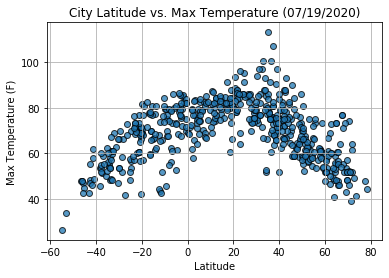

In [102]:
# making a scatter plot of lat vs max temp
plt.title("City Latitude vs. Max Temperature (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_MaxTemp.png")

In [103]:
print(f"This plot shows the relationship between the proximity of the equator and the temp. The closer you are to the equator, the hotter it gets.")

This plot shows the relationship between the proximity of the equator and the temp. The closer you are to the equator, the hotter it gets.


## Latitude vs. Humidity Plot

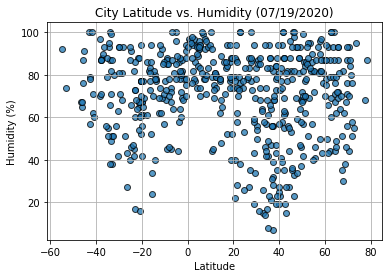

In [13]:
# making a scatter plot of lat vs humidity
plt.title("City Latitude vs. Humidity (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Humidity.png")

In [105]:
print(f"This plot shows the relationship between the proximity of the equator and the humidity. The closer you are to the equator, the more humid it gets.")

This plot shows the relationship between the proximity of the equator and the humidity. The closer you are to the equator, the more humid it gets.


## Latitude vs. Cloudiness Plot

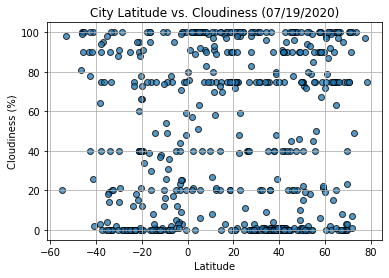

In [14]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Cloudiness (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Cloudiness.png")

In [107]:
print(f"This plot shows the relationship between the proximity of the equator and the percentage of cloudiness. The southern hemisphere is not as cloudy as the northern hemispher.")

This plot shows the relationship between the proximity of the equator and the percentage of cloudiness. The southern hemisphere is not as cloudy as the northern hemispher.


## Latitude vs. Wind Speed Plot

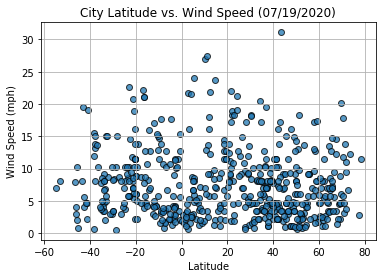

In [15]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Wind Speed (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Wind.png")

In [106]:
print(f"This plot shows the relationship between the proximity of the equator and the wind speed. The closer you are to the equator, the less chance of getting higher wind speeds you have.")

This plot shows the relationship between the proximity of the equator and the wind speed. The closer you are to the equator, the less chance of getting higher wind speeds you have.


## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [31]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[weather_df["Lat"]>.01]
south = weather_df.loc[weather_df["Lat"]<-.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6193193958587668


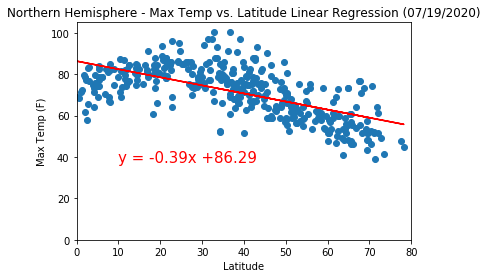

In [45]:
# making a scatter plot of northern hemi - max temp vs latitude
north_x_val = north["Lat"]
north_y_val = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(0,105)
plt.xlim(0, 80)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(10,37.5),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Max_Temp_Vs_Lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7056898296355572


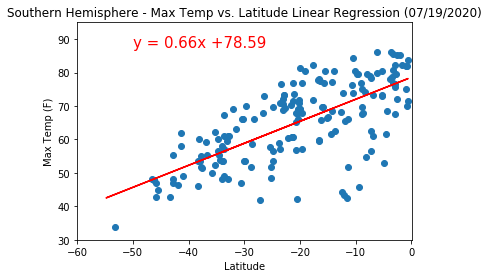

In [69]:
# making a scatter plot of southern hemi - max temp vs latitude
south_x_val = south["Lat"]
south_y_val = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(30,95)
plt.xlim(-60, .1)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-50,87.5),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Max_Temp_Vs_Lat.png")

In [108]:
print(f"The two regression models are not similar, as one is a positive relationship (the southern hemispher) and one is not (northen hemisphere). ")

The two regression models are not similar, as one is a positive relationship (the southern hemispher) and one is not (northen hemisphere). 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.13541904208303426


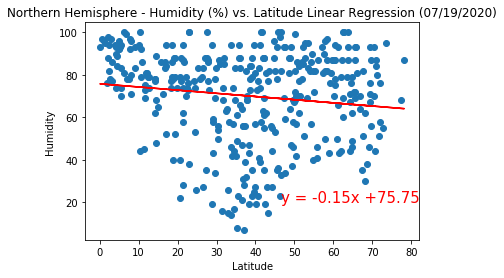

In [82]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,20),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Humid_Vs_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01778423594828527


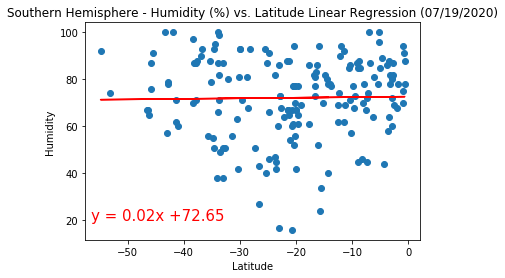

In [85]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-56.5,20),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Humid_Vs_Lat.png")

In [ ]:
print(f"These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10963683905816052


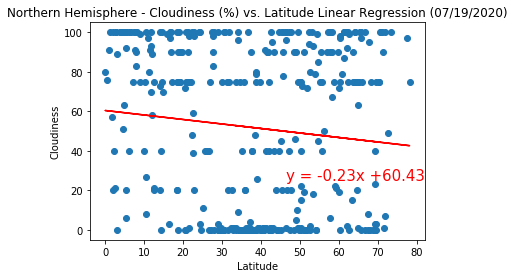

In [88]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,25),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Cloudiness_Vs_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.18144822786376444


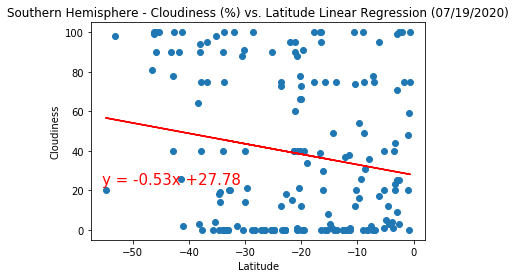

In [94]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.ylim(0,105)
# plt.xlim(100, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-55.5,23),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Cloudiness_Vs_Lat.png")

In [ ]:
print(f"These two regression lines are a bit similar as they are both negative.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08315210977118921


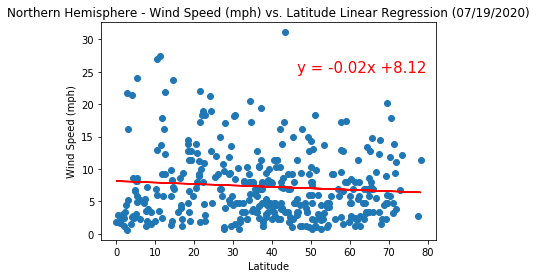

In [95]:
# making a scatter plot of northnern hemi - humidity vs latitude
north_x_val = north["Lat"]
north_y_val = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_val, north_y_val)
regress_values = north_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.ylim(0,105)
# plt.xlim(80, 0)
plt.scatter(north_x_val, north_y_val);
plt.plot(north_x_val, regress_values, "r-")
plt.annotate(line_eq,(46.5,25),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("North_Hem_Wind_Speed_Vs_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.026507917760122998


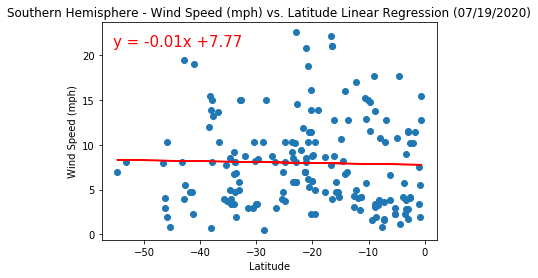

In [100]:
# making a scatter plot of southern hemi - humidity vs latitude
south_x_val = south["Lat"]
south_y_val = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_val, south_y_val)
regress_values = south_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.ylim(0,105)
# plt.xlim(100, 0)
plt.scatter(south_x_val, south_y_val);
plt.plot(south_x_val, regress_values, "r-")
plt.annotate(line_eq,(-55.5,21),fontsize=15,color="red");
print(f"The r-squared is: {rvalue}")
plt.savefig("South_Hem_Wind_Speed_Vs_Lat.png")

In [109]:
print(f"These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. ")

These two regression models are also not similar, and is very difficult to predict because of the flatness of the regression line. 
